# Lung dataset

The direct lung differentiation dataset from *Hurley, K. et al. 
Cell Stem Cell (2020) doi:10.1016/j.stem.2019.12.009*.

This dataset has multiple time points for the state manifold, but only one time point
for the clonal observation on day 27. 

In [1]:
import cospar as cs

In [2]:
cs.logging.print_version()
cs.settings.verbosity=3
cs.settings.data_path='lung_data_paper' # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path='lung_figure_paper' # A relative path to save figures. If not existed before, create a new one.
cs.settings.set_figure_params(format='png',figsize=[4,3],dpi=75,fontsize=14,pointsize=2) 

Running cospar 0.0.8 (python 3.6.12) on 2021-02-17 17:04.


## Loading data

In [3]:
adata_orig=cs.datasets.lung()

In [4]:
adata_orig

AnnData object with n_obs × n_vars = 15832 × 26766
    obs: 'time_info', 'state_info'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'state_info_colors'
    obsm: 'X_clone', 'X_emb', 'X_pca'

## Preprocessing (optional)

In [5]:
preprocessing=False
if preprocessing:
    cs.pp.get_highly_variable_genes(adata_orig,normalized_counts_per_cell=10000,min_counts=3, 
        min_cells=3, min_gene_vscore_pctl=80)

    cs.pp.remove_cell_cycle_correlated_genes(adata_orig,corr_threshold=0.03,confirm_change=False) # optional step
    cs.pp.get_X_pca(adata_orig,n_pca_comp=40) 
    #cs.pp.get_X_umap(adata_orig,n_neighbors=20,umap_min_dist=0.3) # we want to keep the original embedding
    #cs.pp.get_state_info(adata_orig,n_neighbors=20,resolution=0.5) # we want to keep the original state annotation

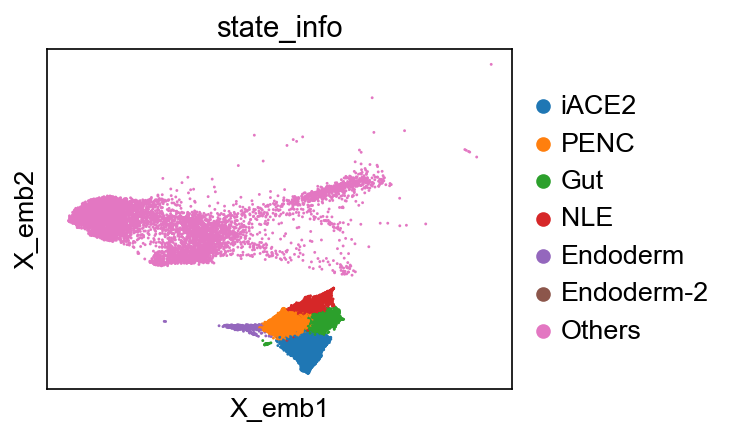

In [6]:
cs.pl.embedding(adata_orig,color='state_info')

In [7]:
cs.hf.check_available_choices(adata_orig)

Available transition maps: []
Available clusters: ['NLE', 'Others', 'Endoderm', 'PENC', 'Gut', 'iACE2']
Available time points: ['pos_21', 'D27', 'pos_17']
Clonal time points: ['D27']


## Raw clonal data analysis

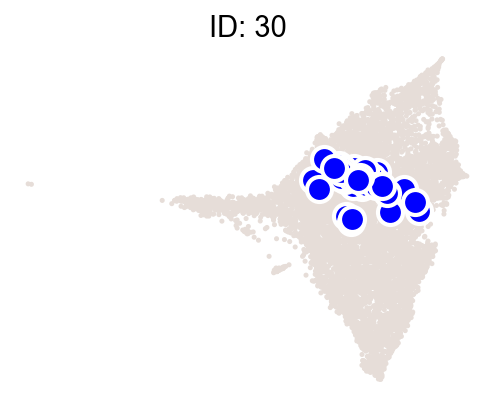

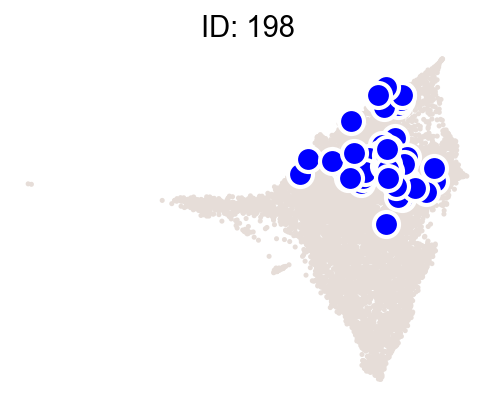

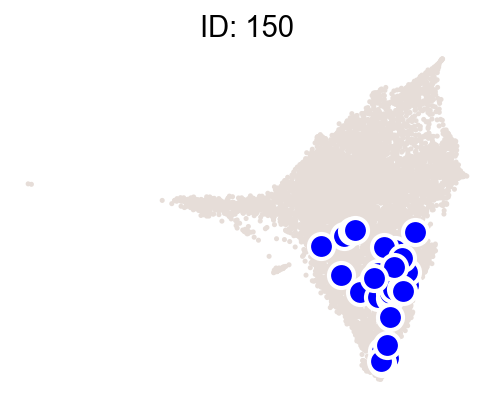

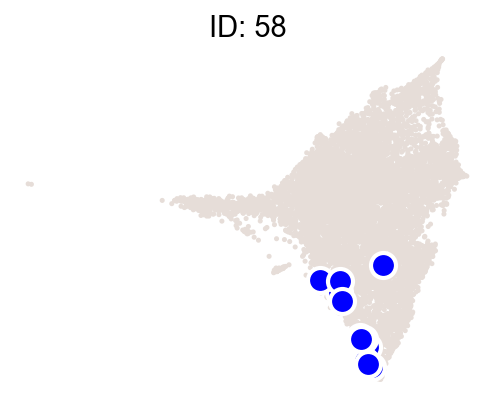

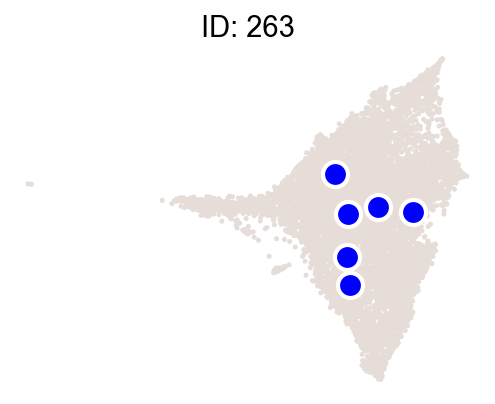

In [8]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[30,198,150,58,263],
            color_list=['blue','red'],selected_time_points=['D27'])

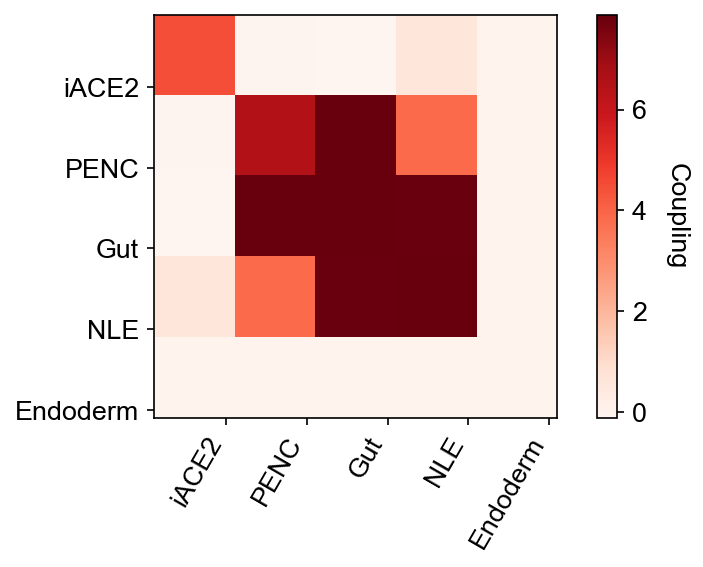

In [9]:
selected_time_point='D27'
cs.pl.fate_coupling_from_clones(adata_orig,selected_time_point,
            selected_fates=['iACE2', 'PENC', 'Gut', 'NLE', 'Endoderm'], color_bar=True)

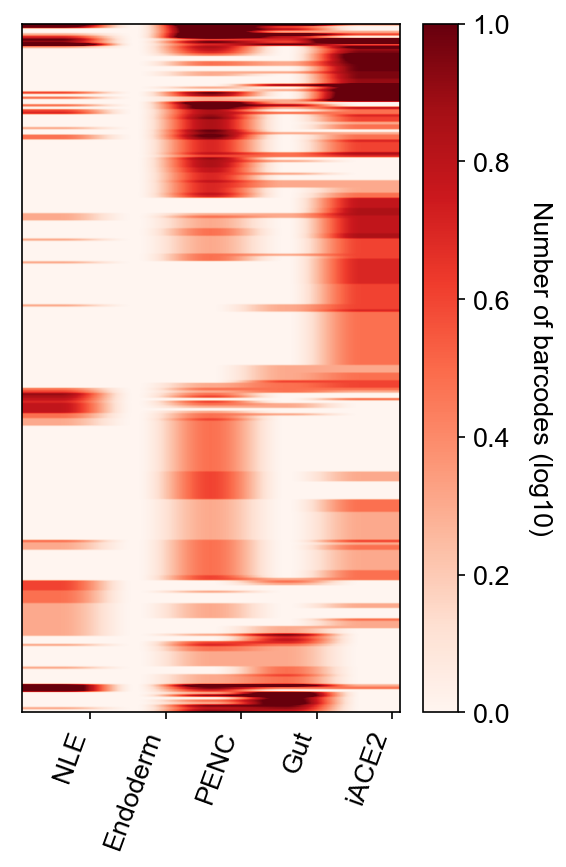

In [10]:
selected_time_point='D27'
cs.pl.barcode_heatmap(adata_orig,selected_time_point,color_bar=True)

This step is slow and optional. The time is linearly proportional to the multiplication of clone number and N_resampling. It takes half a minute for the given parameters. To gain stronger statistical power, increase `N_resampling`.

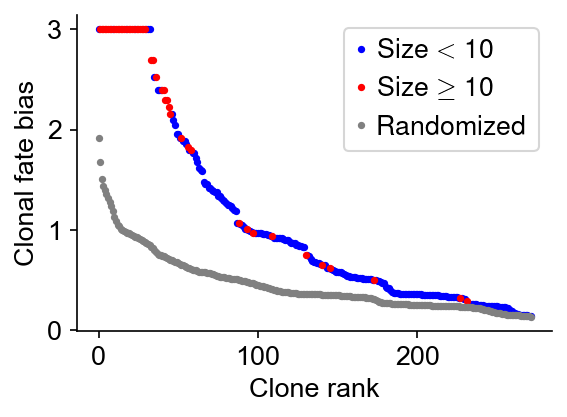

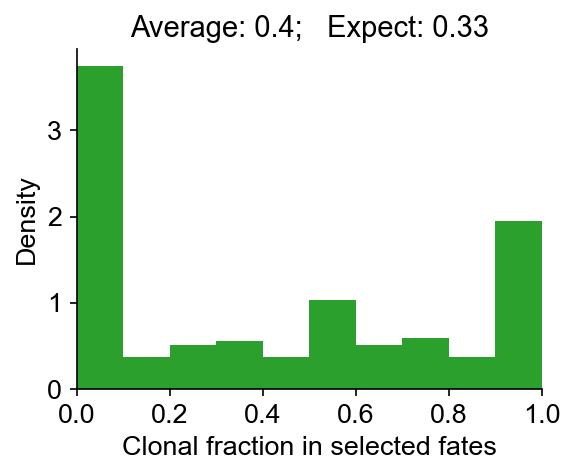

In [11]:
clonal_fate_bias,clone_id=cs.pl.clonal_fate_bias(adata_orig,selected_fate='iACE2',
            clone_size_thresh=10,N_resampling=1000,compute_new=False)

## Infer transition map using clones from the last time point

It takes around 15 minutes to run it for the first time (the data has ~15000 cells). Later runs take < 3 mins. 

-------------------------------New Start--------------------------------------------------
Current time point: pos_17
-----------Pre-processing and sub-sampling cells------------
Compute similarity matrix: computing new; beta=0.1
Smooth round: 1
--> Time elapsed: 0.14094090461730957
Smooth round: 2
--> Time elapsed: 0.3898041248321533
Smooth round: 3
--> Time elapsed: 2.210036039352417
Smooth round: 4
--> Time elapsed: 6.910866022109985
--> Orignal sparsity=0.23726423428822238, Thresholding
--> Final sparsity=0.10114827068121286
similarity matrix truncated (Smooth round=4):  3.8875961303710938
Smooth round: 5
--> Time elapsed: 6.628089904785156
--> Orignal sparsity=0.23745360424170822, Thresholding
--> Final sparsity=0.1382625035076489
similarity matrix truncated (Smooth round=5):  3.622971296310425
Save the matrix at every 5 rounds
Smooth round: 6
--> Time elapsed: 8.765167713165283
--> Orignal sparsity=0.283671706020849, Thresholding
--> Final sparsity=0.17467479961398627
similarity 

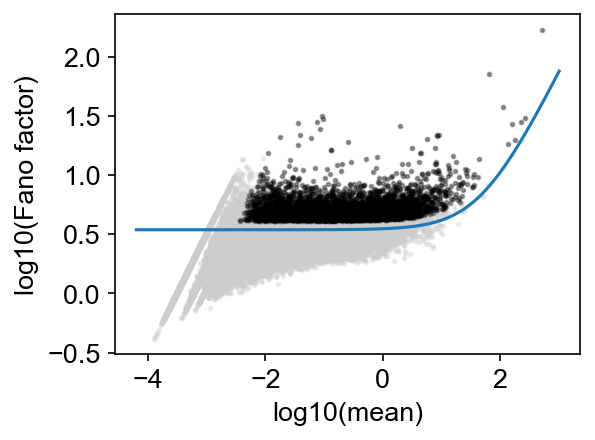

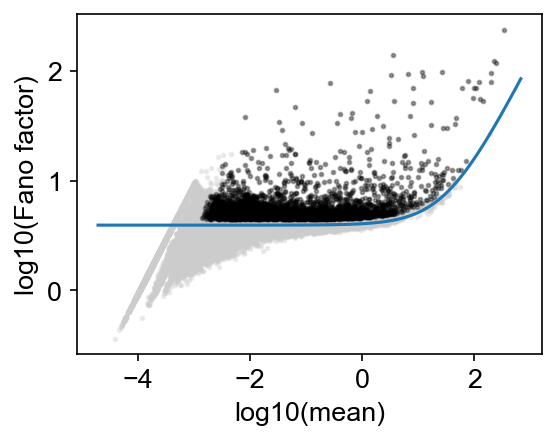

Highly varable gene number at t1 is 3689, Highly varable gene number at t2 is 3729
Common gene set is 1075
----------------
Step b: convert the shared highly variable genes into clonal info
No cells left for assignment, total used genes=867
----------------
Step c: compute the transition map based on clonal info from highly variable genes
---------Compute the transition map-----------
Compute similarity matrix: load existing data
--> Time elapsed:  0.18986177444458008
--> Time elapsed:  1.8689441680908203
--> Time elapsed:  0.14845800399780273
--> Time elapsed:  1.839843988418579
Compute similarity matrix: load existing data
--> Time elapsed:  0.16908788681030273
--> Time elapsed:  1.7030091285705566
--> Time elapsed:  0.15493392944335938
--> Time elapsed:  1.1929121017456055
Compute similarity matrix: load existing data
--> Time elapsed:  0.18310785293579102
--> Time elapsed:  1.4627790451049805
--> Time elapsed:  0.22823691368103027
--> Time elapsed:  1.6153781414031982
Current itera

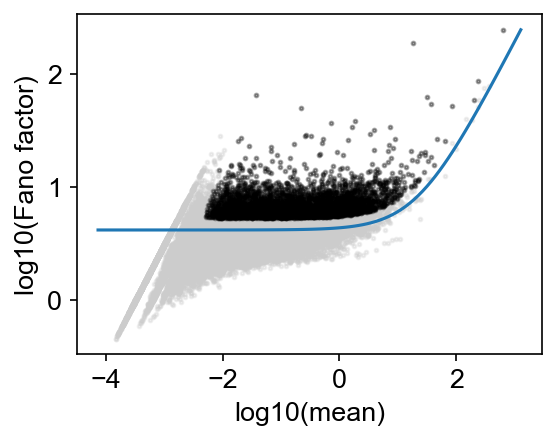

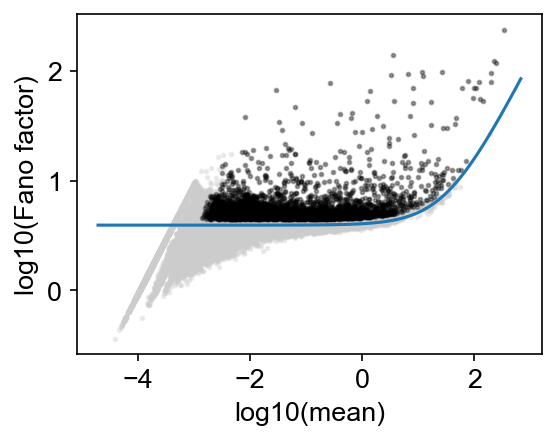

Highly varable gene number at t1 is 3794, Highly varable gene number at t2 is 3729
Common gene set is 1152
----------------
Step b: convert the shared highly variable genes into clonal info
No cells left for assignment, total used genes=1099
----------------
Step c: compute the transition map based on clonal info from highly variable genes
---------Compute the transition map-----------
Compute similarity matrix: load existing data
--> Time elapsed:  0.17103791236877441
--> Time elapsed:  1.9610202312469482
--> Time elapsed:  0.11586594581604004
--> Time elapsed:  1.8810670375823975
Compute similarity matrix: load existing data
--> Time elapsed:  0.11242318153381348
--> Time elapsed:  1.3031527996063232
--> Time elapsed:  0.09984016418457031
--> Time elapsed:  1.1726500988006592
Compute similarity matrix: load existing data
--> Time elapsed:  0.11307811737060547
--> Time elapsed:  1.0942928791046143
--> Time elapsed:  0.0813138484954834
--> Time elapsed:  1.7882061004638672
Current iter

In [12]:
initial_time_points=['pos_17','pos_21']
clonal_time_point='D27'
adata=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points,clonal_time_point,use_full_Smatrix=True,
        initialize_method='HighVar',HighVar_gene_pctl=80,smooth_array=[20,15,10],noise_threshold=0.2)

## Save or load pre-computed map (optional)

This can be used to save adata with maps computed from different tools or parameters.
Usually, different parameter choices will result in different `data_des`, a prefix to identify the anndata.
Saving an adata would print the `data_des`, which can be used to load the corresponding adata.

In [13]:
save_data=False
if save_data:
    cs.hf.save_map(adata)
    
load_data=False
if load_data:
    ## updated Jan 27, 2021
    #data_des='paper_OneTimeClone_t*pos_17*pos_21*D27'
    data_des='CoSpar_OneTimeClone_t*pos_17*pos_21*D27' # computed on Jan 30, 2021
    adata=cs.hf.load_saved_adata_with_key(data_des)


## Plotting

There are some common parameters:

* `used_map_name` (str). It determines which transition map to use for analysis. Choices: {‘transition_map’, ‘intraclone_transition_map’, ‘OT_transition_map’, ‘HighVar_transition_map’,’clonal_transition_map’}

* `selected_fates` (list of str). Selected clusters to aggregate differentiation dynamics and visualize fate bias etc.. It allows nested structure, e.g., selected_fates=[‘a’, [‘b’, ‘c’]] selects two clusters: cluster ‘a’ and the other that combines ‘b’ and ‘c’.

* `map_backwards` (bool, default True). We can analyze either the forward transitions, i.e., where the selected states or clusters are going (map_backwards=False), or the backward transitions, i.e., where these selected states or clusters came from (map_backwards=True). The latter is more useful, and is the default.

* `selected_time_points` (list, default all). List of time points to use. By default, all are used. 

* `normalize_by_fate_size` (bool, default False). Normalize the fate probability Prob(X) towards a cluster X by the expected probability, i.e., the fraction of cells within the targeted cluster X at the corresponding time point.  

### Fate map

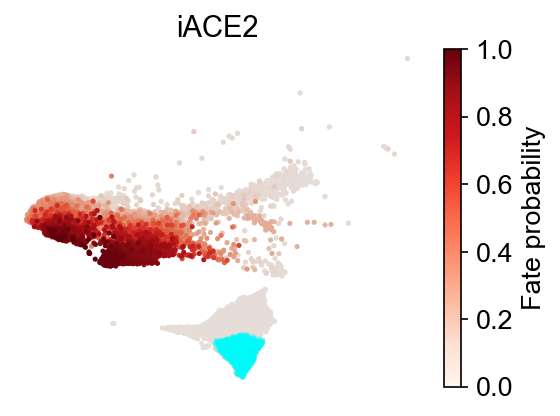

In [14]:
cs.pl.fate_map(adata,selected_fates=['iACE2'],selected_time_points=['pos_17','pos_21'],
               used_map_name='transition_map',map_backwards=True,plot_target_state=True,show_histogram=False)

### Relative fate bias

First, run the `binary_fate_bias` function with default setting: 

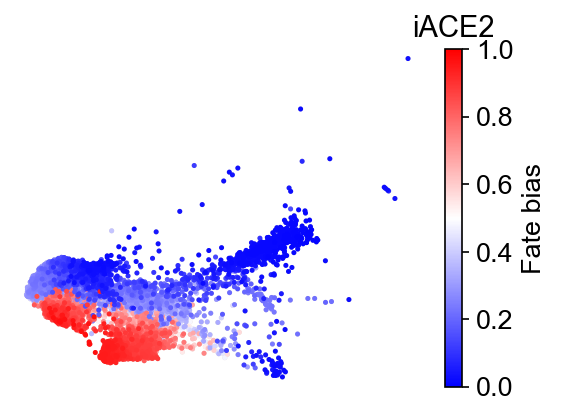

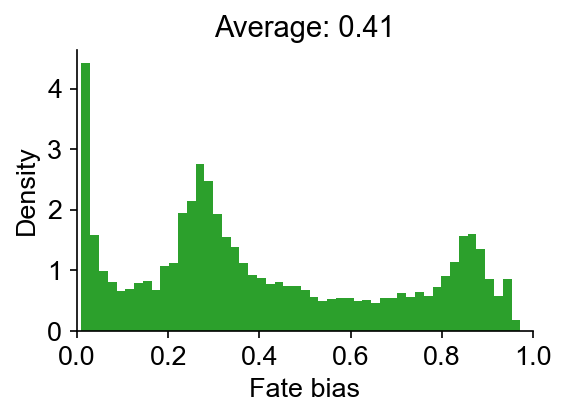

In [15]:
selected_fates=['iACE2',['PENC', 'Gut', 'NLE', 'Endoderm']]
cs.pl.binary_fate_bias(adata,selected_fates,used_map_name='transition_map',
            selected_time_points=['pos_17','pos_21'],plot_target_state=False,map_backwards=True,color_bar=True)

We can see that there is an intermediate peak of fate bias around 0.3, which deviates from the expected value 0.5 for multipotent cells. This is due to the difference of relative sizes of the used clusters. To adjust for this difference, we set `normalize_by_fate_size=True`. 


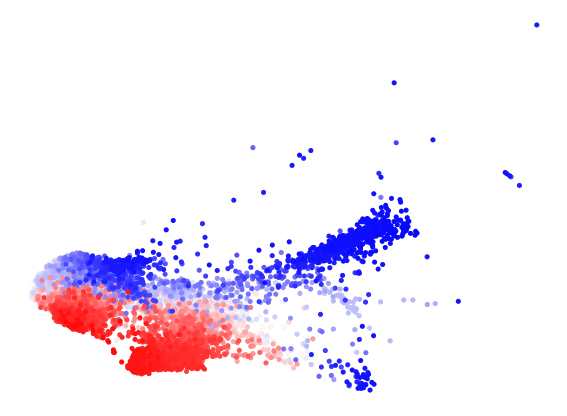

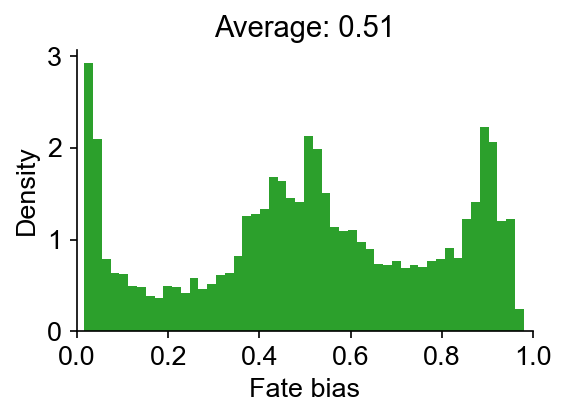

In [16]:
cs.pl.binary_fate_bias(adata,selected_fates,used_map_name='transition_map',normalize_by_fate_size=True,
            selected_time_points=['pos_17','pos_21'],plot_target_state=False,map_backwards=True,color_bar=False)

Now, this intermediate peak is around 0.5. Specifically, for day 17, we have 

/Users/shouwenwang/Dropbox (HMS)/Python_file/Clonal_tracing/cell_lineage_tracing/code_for_clonal_dynamics/Python/WOT/CoSpar_Package_development/CoSpar/cospar/plotting/_plotting.py:724: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


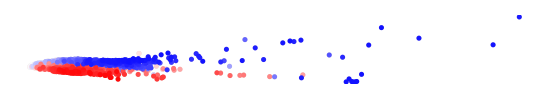

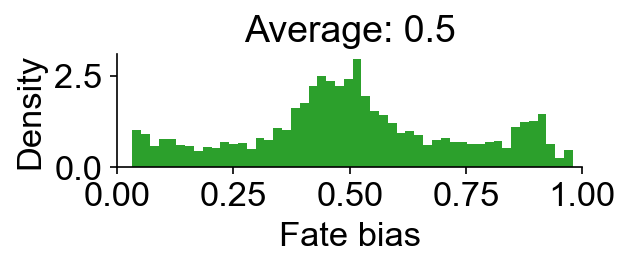

In [17]:
cs.settings.set_figure_params(format='png',figsize=[4,1],dpi=75,fontsize=18,pointsize=2) 

cs.pl.binary_fate_bias(adata,selected_fates,used_map_name='transition_map',normalize_by_fate_size=True,
            selected_time_points=['pos_17'],plot_target_state=False,map_backwards=True,color_bar=False)

We adjusted the plot setting in the previous run. Now, change it back.

In [18]:
cs.settings.set_figure_params(format='png',figsize=[4,3.5],dpi=75,fontsize=18,pointsize=2) 

### Dynamic trajectory inference on day 17

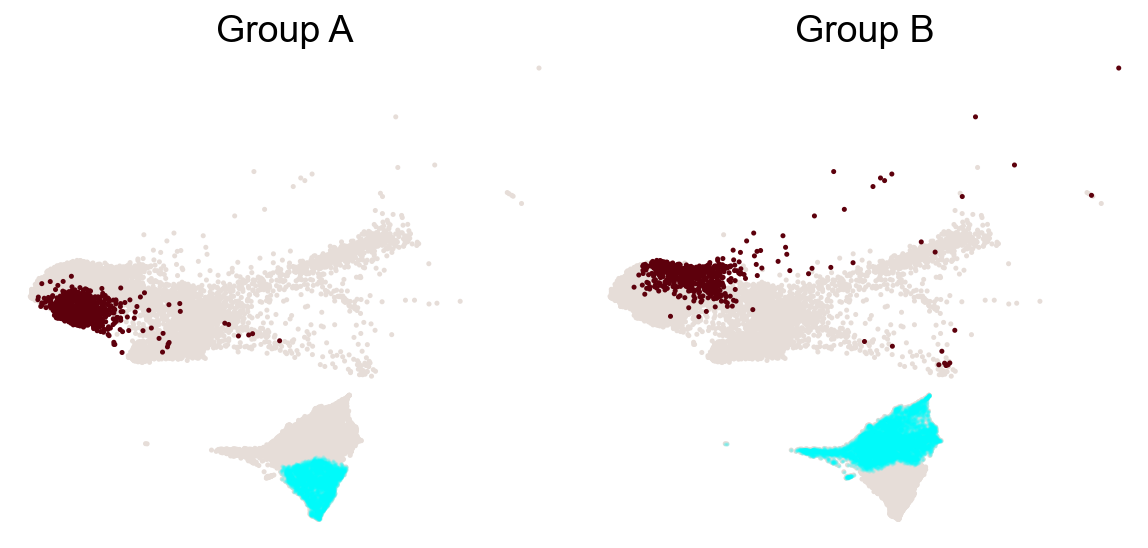

In [19]:
selected_fates=['iACE2',['PENC', 'Gut', 'NLE', 'Endoderm']]
cs.pl.dynamic_trajectory_from_binary_fate_bias(adata,selected_fates,normalize_by_fate_size=True,
            used_map_name='transition_map',sum_fate_prob_thresh=0,bias_threshold=0.2,
                            selected_time_points=['pos_17'])

### Differential genes for two ancestor groups on day 17

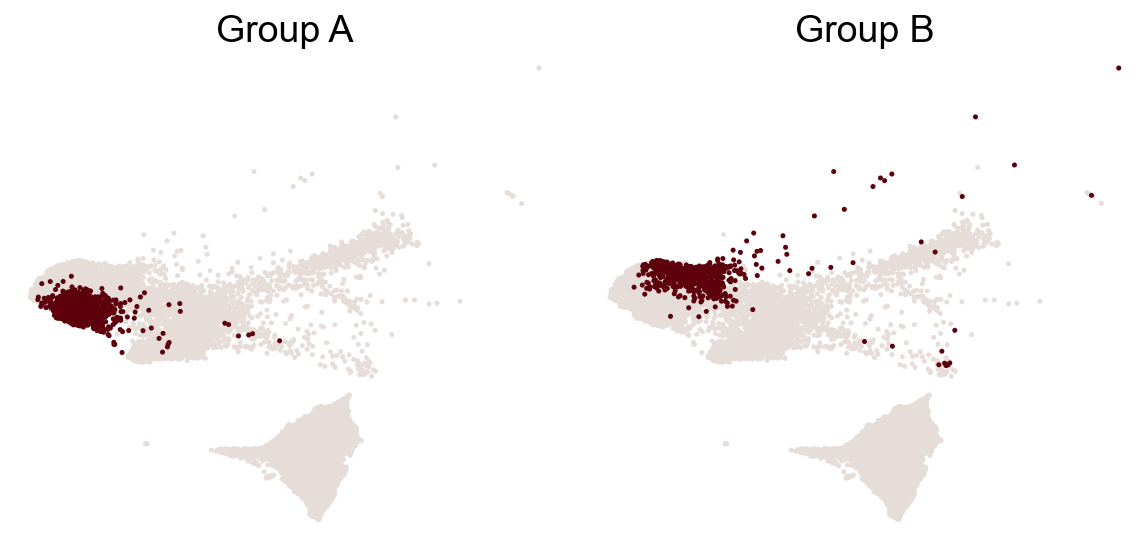

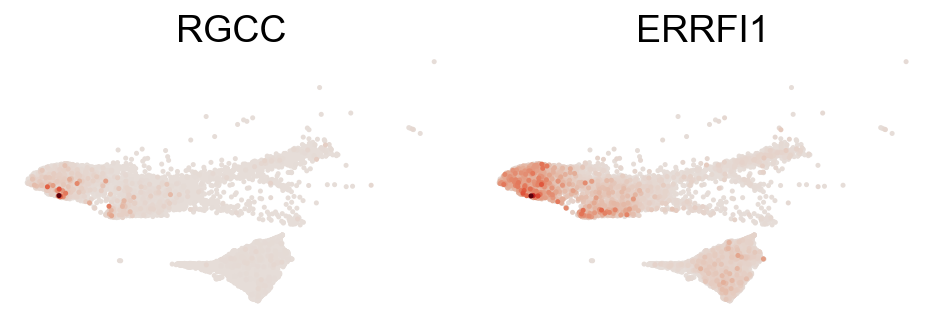

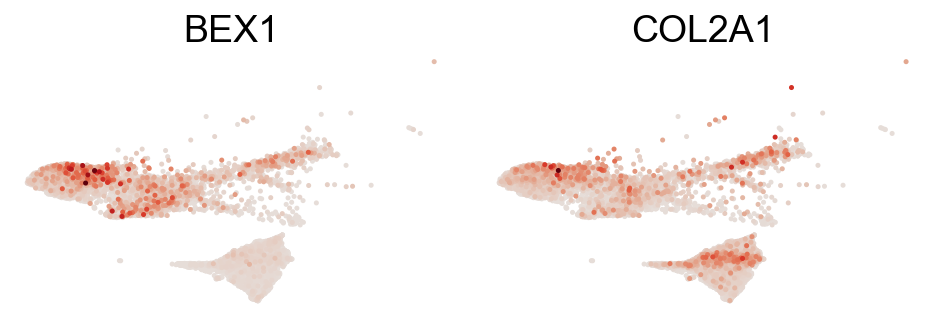

In [20]:
dge_gene_A, dge_gene_B=cs.pl.differential_genes(adata,plot_gene_N=2,gene_N=100)

In [21]:
dge_gene_A

,gene,pv,mean_1,mean_2,ratio
177,RGCC,1.830097e-09,0.617490,4.374441,-1.732358
0,ERRFI1,2.463290e-91,6.115779,18.754799,-1.473109
20,STOM,6.022745e-34,0.797206,3.905667,-1.448694
116,KLF9,1.255200e-14,0.393874,2.584578,-1.362704
29,SLC7A11,3.211690e-30,3.290058,9.198499,-1.249288
...,...,...,...,...,...
339,UBL3,1.561995e-05,2.293530,3.551713,-0.466775
222,FAM177A1,1.108767e-07,1.573094,2.549999,-0.464314
271,YRDC,1.168121e-06,3.600804,5.315058,-0.456910
285,LIN7A,2.007364e-06,0.582151,1.162380,-0.450732


### Dynamic trajectory on both day 17 and 21

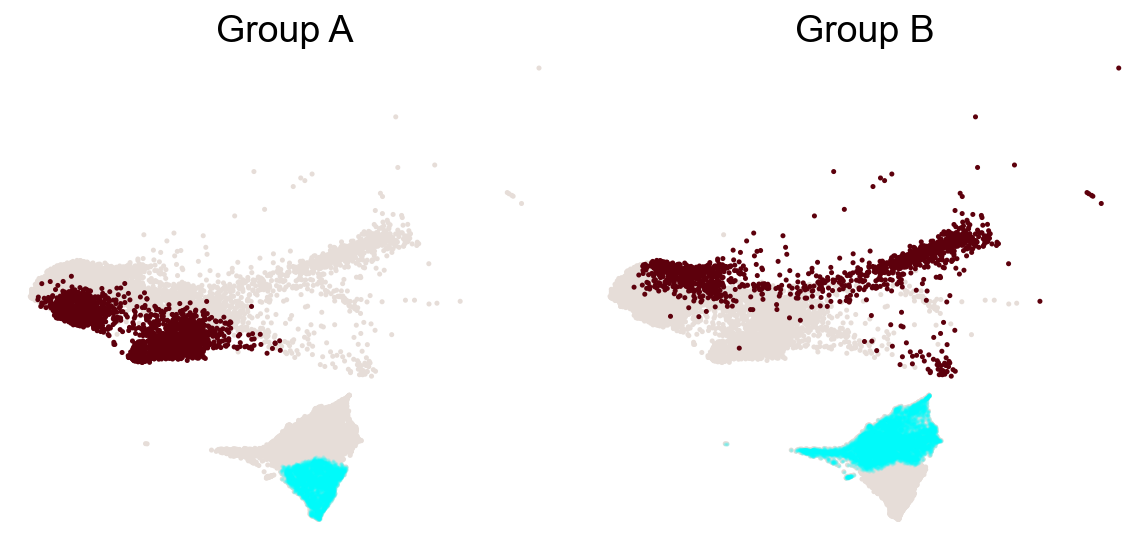

In [22]:
selected_fates=['iACE2',['PENC', 'Gut', 'NLE', 'Endoderm']]
cs.pl.dynamic_trajectory_from_binary_fate_bias(adata,selected_fates,normalize_by_fate_size=True,
            used_map_name='transition_map',sum_fate_prob_thresh=0,bias_threshold=0.2,
                            selected_time_points=['pos_17','pos_21'])

### Gene trend along the dynamic trajectory

The selected states, combined with the target states are stored as dynamic trajectory at `adata.uns['dynamic_trajectory']`.
We can plot gene trend along this trajectory

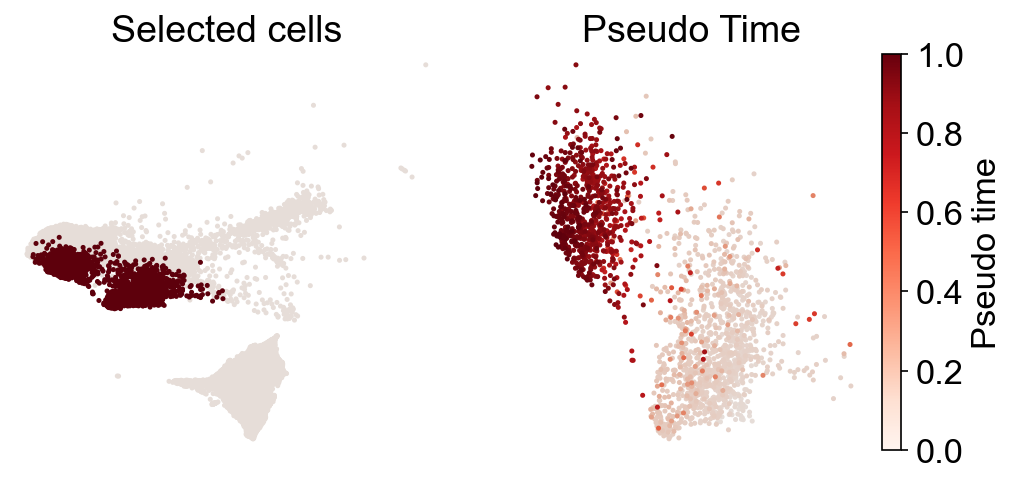

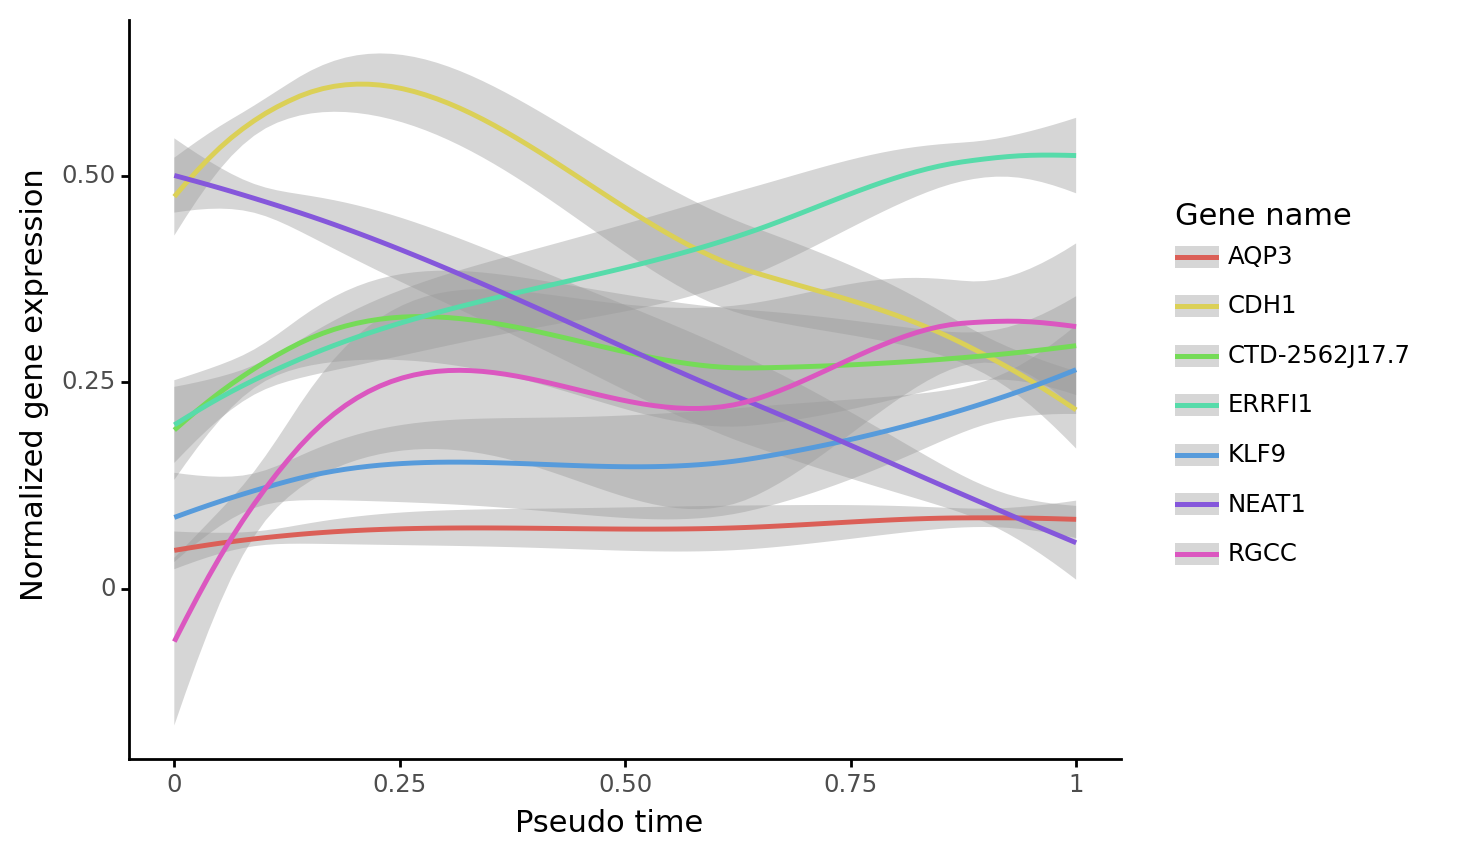

In [23]:
adata_selected=cs.pl.gene_expression_dynamics(adata,selected_fate='iACE2',include_target_states=False,
    gene_name_list=['NEAT1', 'RGCC', 'KLF9', 'ERRFI1', 'AQP3', 'CDH1', 'CTD-2562J17.7'])
